## 2. EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
fp = "/content/drive/My Drive/BT4222 Group Project/Final Project/Codes/Jar of Pickles/twitter_cleaned.pkl"
with open(fp,"rb") as f:
    twitter_cleaned = pickle.load(file=f)

In [3]:
twitter_cleaned.head()

,tweets_cleaned,neutral,hate
0,woman complain cleaning house amp man trash,1,0
1,boy dats cold tyga dwn bad cuffin dat hoe st...,0,1
2,dawg fuck bitch start cry confused shit,0,1
3,look like tranny,0,1
4,shit hear true faker bitch told ya,0,1


### Understanding the Data: removing repeated top words 

In [4]:
import itertools
import collections

### Trying to identify the top few word that is used in each class

# For class neutral, neutral = 1
nwl = [tweet.split() for tweet in twitter_cleaned.tweets_cleaned[twitter_cleaned['neutral'] == 1 ]]

word_list_neutral = list(itertools.chain(*nwl))

neutral_count_word = collections.Counter(word_list_neutral)

print(neutral_count_word.most_common(20))

# For class hate, hate = 1
hwl = [tweet.split() for tweet in twitter_cleaned.tweets_cleaned[twitter_cleaned['hate'] == 1 ]]

word_list_hate = list(itertools.chain(*hwl))

hate_count_word = collections.Counter(word_list_hate)

print(hate_count_word.most_common(20))

[('trash', 689), ('like', 304), ('bird', 304), ('charlie', 259), ('yankees', 223), ('yellow', 218), ('birds', 171), ('amp', 166), ('lol', 145), ('got', 131), ('colored', 117), ('monkey', 115), ('ghetto', 113), ('u', 111), ('good', 95), ('know', 90), ('new', 90), ('love', 87), ('day', 85), ('game', 85)]
[('bitch', 8299), ('bitches', 3109), ('like', 2480), ('hoes', 2376), ('pussy', 2135), ('hoe', 1907), ('ass', 1572), ('got', 1469), ('fuck', 1425), ('shit', 1278), ('nigga', 1225), ('u', 1185), ('lol', 941), ('niggas', 790), ('know', 721), ('amp', 681), ('fucking', 631), ('love', 629), ('yo', 597), ('bad', 535)]


In [6]:
### Comparing the top 20 words in each class, we found some common words.
### Common words are removed from the tweets as additional stopwords.
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

additional_stopwords = ["amp","u","lol","got","know","love"] # common words
stopwords = list(STOP_WORDS) + additional_stopwords
parser = English()
def spacy_tokenizer_2(sentence):
    # input: tweet
    # output: tweet, with new stopwords removed
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [11]:
from tqdm import tqdm
tqdm.pandas()
twitter_cleaned["tweets_cleaned"] = twitter_cleaned["tweets_cleaned"].progress_apply(spacy_tokenizer_2)
twitter_cleaned.head()

100%|██████████| 24783/24783 [00:03<00:00, 6938.85it/s]


,tweets_cleaned,neutral,hate
0,woman complain cleaning house man trash,1,0
1,boy dats cold tyga dwn bad cuffin dat hoe st...,0,1
2,dawg fuck bitch start cry confused shit,0,1
3,look like tranny,0,1
4,shit hear true faker bitch told ya,0,1


In [12]:
### Running top repeated words per class again for EDA

# Neutral
nwl_2 = [tweet.split() for tweet in twitter_cleaned.tweets_cleaned[twitter_cleaned['neutral'] == 1 ]]

word_list_neutral2 = list(itertools.chain(*nwl_2))

neutral_count_word2 = collections.Counter(word_list_neutral2)

print(neutral_count_word2.most_common(20))

# Hate
hwl_2 = [tweet.split() for tweet in twitter_cleaned.tweets_cleaned[twitter_cleaned['hate'] == 1 ]]

word_list_hate2 = list(itertools.chain(*hwl_2))

hate_count_word2 = collections.Counter(word_list_hate2)

print(hate_count_word2.most_common(20))

[('trash', 689), ('like', 304), ('bird', 304), ('charlie', 259), ('yankees', 223), ('yellow', 218), ('birds', 171), ('colored', 117), ('monkey', 115), ('ghetto', 113), ('good', 95), ('new', 90), ('day', 85), ('game', 85), ('man', 84), ('people', 83), ('want', 83), ('ho', 80), ('time', 79), ('brownies', 78)]
[('bitch', 8300), ('bitches', 3109), ('like', 2480), ('hoes', 2376), ('pussy', 2135), ('hoe', 1907), ('ass', 1572), ('fuck', 1425), ('shit', 1278), ('nigga', 1225), ('niggas', 790), ('y', 680), ('fucking', 631), ('yo', 597), ('bad', 535), ('want', 499), ('trash', 465), ('ya', 460), ('man', 454), ('good', 437)]


In [ ]:
# saving train, cv and test processed data and labels
import pickle
fp = "/content/drive/My Drive/BT4222 Group Project/Final Project/Codes/Jar of Pickles/twitter_cleaned.pkl"
with open(fp,mode="wb") as f:
    pickle.dump(obj=(twitter_cleaned),
                file=f)

### N-Gram Analysis 


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def ngram_wordcloud(twitter_cleaned, n):

  vectorizer = CountVectorizer(ngram_range=(n,n)) # investigate specific n at a time
  data_vectorized = vectorizer.fit_transform(twitter_cleaned.tweets_cleaned)

  df = vectorizer.fit_transform(twitter_cleaned.tweets_cleaned).toarray().sum(axis=0)
  word_freq = pd.DataFrame(df.reshape(1, df.shape[0]), columns=vectorizer.get_feature_names_out())
  word_freq.sort_values(by=0, axis=1, ascending=False, inplace=True)

  wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      min_font_size = 10, collocations = False)

  wordcloud.generate_from_frequencies(frequencies=word_freq.T.to_dict()[0])

  plt.figure(figsize=(4,4), dpi=200)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

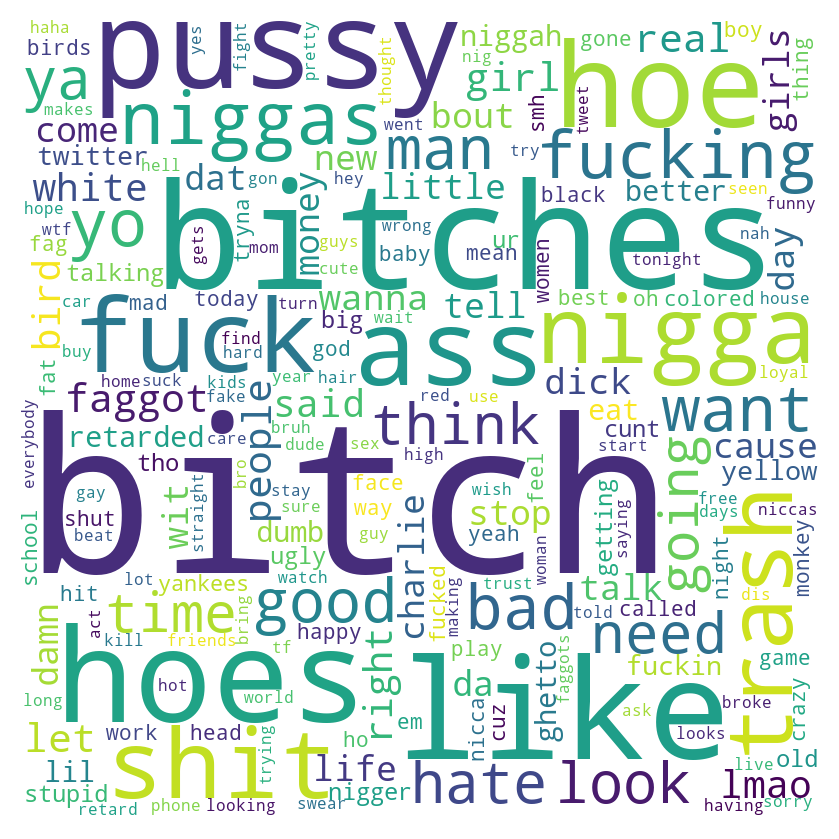

In [20]:
# unigram
ngram_wordcloud(twitter_cleaned, 1)

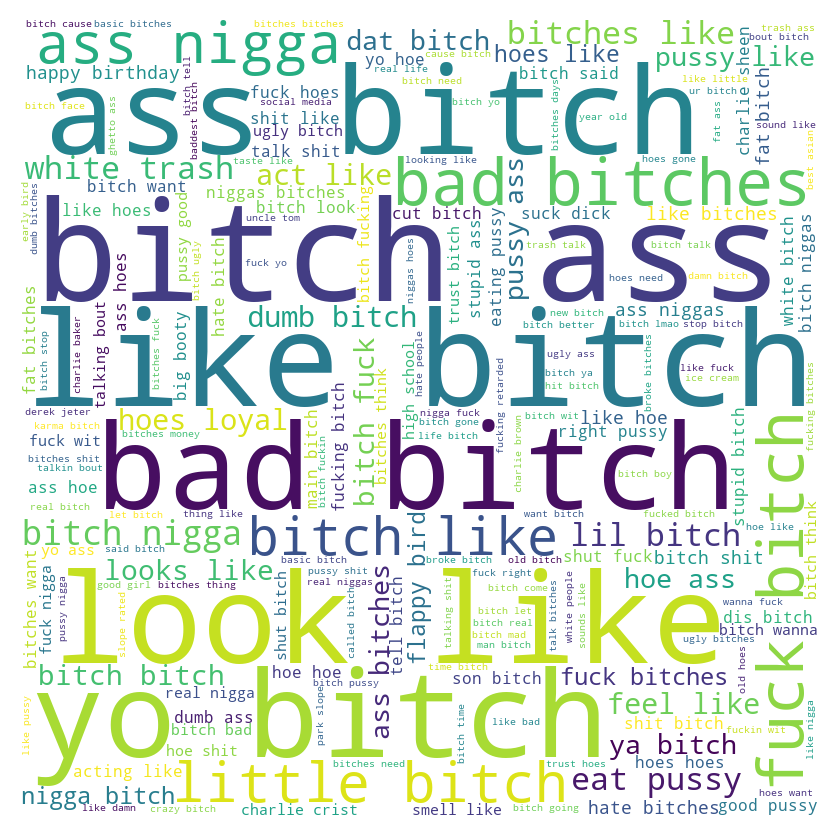

In [21]:
# bigram
ngram_wordcloud(twitter_cleaned,2)

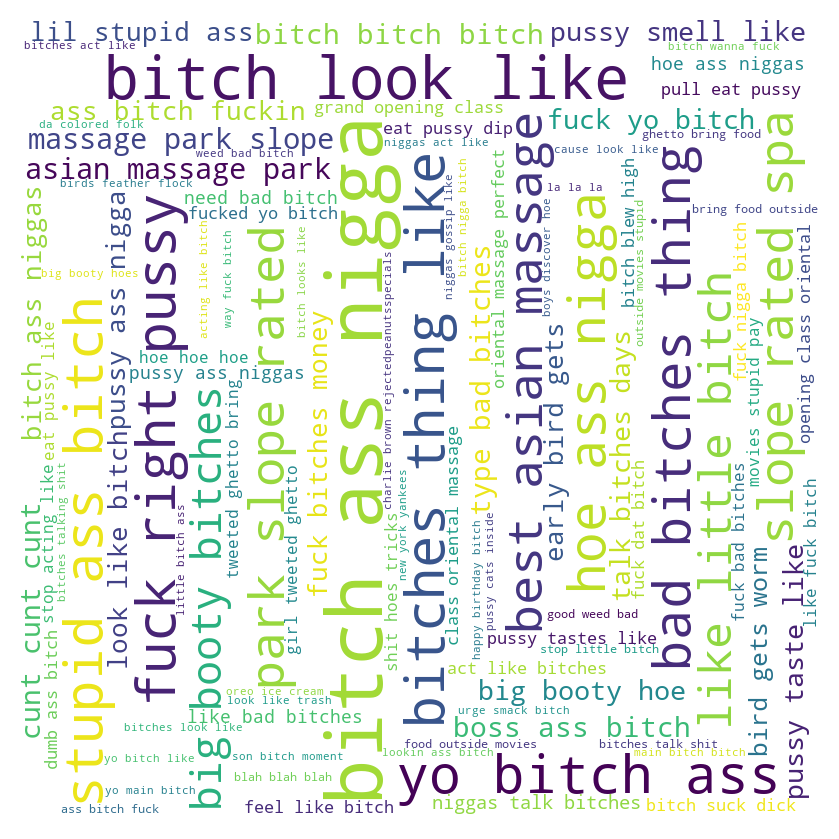

In [22]:
# trigram
ngram_wordcloud(twitter_cleaned,3)

### Unsupervised Learning for Topic Modelling 

Using Topic Modelling to conduct a rough EDA on the frequent words under different topics

https://www.kaggle.com/code/thebrownviking20/topic-modelling-with-spacy-and-scikit-learn/notebook

In [23]:
!pip install pyldavis
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=203e1b1f8271570a525d8f950928a21181e00f3557e71c9246a64d89b72edfe7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [24]:
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}')
data_vectorized = vectorizer.fit_transform(twitter_cleaned.tweets_cleaned)
NUM_TOPICS = 6

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Training Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

# Training Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [27]:
# Function for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [28]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model Keywords ----------------------------------------")
selected_topics(lda, vectorizer)

# Keywords for topics clustered by Latent Semantic Indexing
print("NMF Model Keywords ----------------------------------------")
selected_topics(nmf, vectorizer)

# Keywords for topics clustered by Non-Negative Matrix Factorization
print("LSI Model Keywords ----------------------------------------")
selected_topics(lsi, vectorizer)

LDA Model Keywords ----------------------------------------
Topic 0:
[('bitch', 4111.3493211985015), ('ass', 651.2396013891789), ('hate', 465.57157061892843), ('need', 464.2760817318327), ('people', 436.84716341864254), ('bad', 406.15324582451296), ('fuck', 396.28148592864454), ('white', 372.5359932760438), ('fuckin', 262.8894730324871), ('yankees', 228.9949373900345)]
Topic 1:
[('fucking', 636.8472475564139), ('like', 490.9415002200915), ('bird', 388.6864286519081), ('pussy', 373.2744924587588), ('stop', 332.8944763990862), ('talk', 317.753670399002), ('come', 307.6539996796973), ('charlie', 291.9170876042688), ('lil', 269.2269905894852), ('ghetto', 264.67084201560215)]
Topic 2:
[('hoes', 2478.860652996344), ('hoe', 1964.2744202927981), ('pussy', 495.02517895945846), ('like', 461.6112434406794), ('good', 390.8653367640818), ('faggot', 388.5309731318498), ('day', 348.67758178198005), ('cause', 291.29136697195463), ('yellow', 259.6973449367733), ('niggah', 255.1144444781013)]
Topic 3:
[


- Topics on the left while their respective keywords are on the right.
- Larger topics are more frequent and closer the topics, mor the similarity
-Selection of keywords is based on their frequency and discriminancy.

In [30]:
import pyLDAvis.sklearn
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')

pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4       1.465019 -47.625065       1        1  18.278008
3      54.854797 -36.476795       2        1  17.031588
2      32.212929 -61.444572       3        1  16.948766
5       5.111096 -14.110332       4        1  16.840319
0      26.350170 -33.374702       5        1  15.820077
1      38.109818  -7.222781       6        1  15.081242, topic_info=         Term         Freq        Total Category  logprob  loglift
305     bitch  8046.000000  8046.000000  Default  30.0000  30.0000
1560     hoes  2376.000000  2376.000000  Default  29.0000  29.0000
1559      hoe  1883.000000  1883.000000  Default  28.0000  28.0000
2281    nigga  1195.000000  1195.000000  Default  27.0000  27.0000
3450    trash  1118.000000  1118.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
283       bet    94.460549    95.267028   Topic6  -5.3128   1.8832
1919     like   481.319112  2711.501049   Topic6  -3.6845   0.1630
2618    pussy   365.958362  2033.823136   Topic6  -3.9585   0.1766
306   bitches   230.916200  3137.839306   Topic6  -4.4190  -0.7175
2925     shit   177.253497  1244.822959   Topic6  -4.6834  -0.0574

[266 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
14        4  0.990563     act
141       1  0.992172     ask
147       1  0.239924     ass
147       2  0.326620     ass
147       3  0.010081     ass
...     ...       ...     ...
3779      3  0.997031    yeah
3780      2  0.997314    year
3786      3  0.997196  yellow
3789      2  0.995842     yes
3795      4  0.996611   young

[256 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 6, 1, 2])